In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import pickle
import os

from amftrack.util.sys import (

    update_plate_info,

    get_current_folders,
)

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
)

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Node,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.post_processing.exp_plot import *
import pickle
import scipy.io as sio
import networkx as nx
import numpy as np
from sthype import SpatialGraph, HyperGraph
from sthype.graph_functions import spatial_temporal_graph_from_spatial_graphs

import matplotlib.pyplot as plt
import os
import pickle
from tqdm import tqdm
import pandas as pd
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_all_edges,
    get_all_nodes, get_timedelta_second,
)
from amftrack.pipeline.functions.transport_processing.high_mag_videos.temporal_graph_util import *
mpl.rcParams["figure.dpi"] = 100
import seaborn as sns
plt.style.use('presentation.mplstyle')
import logging
from scipy.optimize import bisect

# Get the logger for 'fontTools'
font_tools_logger = logging.getLogger('fontTools')

# Set the logging level to WARNING, which ignores DEBUG and INFO messages
font_tools_logger.setLevel(logging.WARNING)

c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
path_figure = r"C:\Users\coren\Documents\PhD\thesis\Conclusion"

In [3]:
def solve_equation(triples, max_iterations=100, tolerance=1e-6):
    solutions = []
    for triple in triples:
        a, b, c = triple
        # Define the equation
        def equation(x):
            return a ** x - (b ** x + c ** x)

        # Find the interval where the function crosses the x-axis
        x = np.linspace(-1, 20, num=1000)
        y = equation(x)
        sign_changes = np.where(np.diff(np.sign(y)))[0]
        if len(sign_changes) == 0:
            continue  # Skip this solution if no sign changes are found
            
        for i in sign_changes:
            # Bisect the interval with a sign change to find the root
            try:
                root = bisect(equation, x[i], x[i+1])
                if root >= 1:
                    solutions.append([root, a, b, c])
            except ValueError:
                # Handle cases where no root is found within the interval
                pass # Both here and if there are no sign changes, you can store the values if you want or count them
    return solutions

In [4]:
df = pd.read_csv('murray_data.csv')
df['index'] = df.index // 2
df = df.groupby('index').mean()

# Initialize arrays a, b, and c
triples = []

# Iterate over daughter_table_3 in chunks of three rows
for i in range(0, len(df), 3):
    # Sort the 'diameter' values within each chunk from highest to lowest
    triples.append(sorted(df['diameter'].iloc[i:i+3], reverse=True))

# Add the exponents
murray_data2 = solve_equation(triples)

261


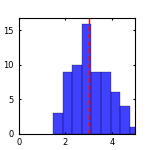

In [16]:
exponent1 = [item[0] for item in murray_data2]
print(len(df))
fig,ax = plt.subplots(figsize = (1.5,1.5))
histo = sns.histplot(exponent1, bins = 40, color='blue')
ax.set_xlim(0,5)
ax.set_xlabel("Murray exponent")
ax.set_ylabel("Count")
ax.axvline(3,color="red",linestyle="dashed")
plt.savefig(
    os.path.join(path_figure, f"Murray_exponent.pdf"),
    transparent=True,
    bbox_inches="tight",
)

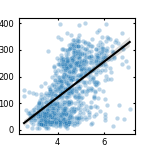

In [17]:
df2 = pd.read_csv("length_growth_speed.csv")
df2 = df2[df2['radius (um)']<7.5]
df2 = df2[df2['length_growth_speed (um/h)']<400]

df2['radius (um)'] = df2['radius (um)']
fig,ax = plt.subplots(figsize = (1.5,1.5))
sns.scatterplot(df2,x="radius (um)",y="length_growth_speed (um/h)",alpha = 0.3,s=10)
sns.regplot(df2,x="radius (um)",y="length_growth_speed (um/h)",scatter = False,color ="black")
ax.set_xlabel("hyphal tip radius ($\mu m$)")
ax.set_ylabel("hyphal tip growth speed \n ($\mu m/h$)")
plt.savefig(
    os.path.join(path_figure, f"radius_speed.pdf"),
    transparent=True,
    bbox_inches="tight",
)